In [ ]:
# Austrailian Weather report
# To predict using random forest and decision tree models on when rains might occur based on the previous data that is available

In [2]:
# Decision Tree and Random Forest
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:01<00:00, 2.04MB/s]

In [4]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [6]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# Removing empty rows
raw_df.dropna(subset=['RainTomorrow', 'RainToday'], inplace = True)

<Axes: title={'center': 'No. of Rows per year'}, xlabel='Date', ylabel='count'>

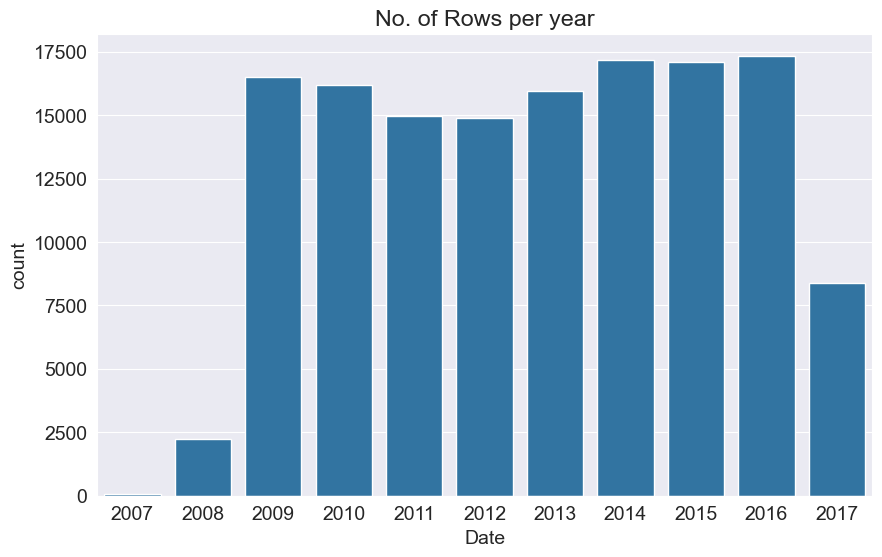

In [10]:
plt.title("No. of Rows per year")
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year

In [13]:
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print("Training", train_df.shape)
print("Validation", val_df.shape)
print("Testing", test_df.shape)

Training (97988, 23)
Validation (17089, 23)
Testing (25710, 23)


In [14]:
input_cols = list(train_df.columns)[1:-1]
target_cols = "RainTomorrow"

In [16]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]

In [17]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]

In [18]:
test_inputs = val_df[input_cols]
test_targets = val_df[input_cols]

In [19]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.to_list()
categorical_cols = train_inputs.select_dtypes('object').columns.to_list()

In [20]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [21]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [22]:
# Imputing missing numerical values using the imputer function
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [23]:
train_inputs[numeric_cols] = impute.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = impute.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = impute.transform(val_inputs[numeric_cols])

C:\Users\Akhil\AppData\Local\Temp\ipykernel_18200\3844424569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = impute.transform(train_inputs[numeric_cols])
C:\Users\Akhil\AppData\Local\Temp\ipykernel_18200\3844424569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols] = impute.transform(test_inputs[numeric_cols])
C:\Users\Akhil\AppData\Local\Temp\ipykernel_18200\3844424569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [24]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [25]:
# Scaling the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

C:\Users\Akhil\AppData\Local\Temp\ipykernel_18200\4239354884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
C:\Users\Akhil\AppData\Local\Temp\ipykernel_18200\4239354884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
C:\Users\Akhil\AppData\Local\Temp\ipykernel_18200\4239354884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [26]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [35]:
# One hot Encoding categorical data

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [39]:
# We are encoding the columsn so that they ML can process the algorithms
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [40]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2133,Albury,0.469340,0.724008,0.0,0.037741,0.526244,WSW,0.186047,ESE,W,0.053846,0.126437,0.45,0.14,0.545455,0.5424,0.492351,0.499917,0.594937,0.731286,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2134,Albury,0.566038,0.839319,0.0,0.037741,0.526244,NE,0.387597,ESE,ESE,0.069231,0.103448,0.45,0.12,0.586777,0.5648,0.492351,0.499917,0.691983,0.836852,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2135,Albury,0.603774,0.814745,0.0,0.037741,0.526244,NNE,0.325581,NE,N,0.153846,0.229885,0.35,0.19,0.618182,0.5632,0.492351,0.499917,0.767932,0.813820,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2136,Albury,0.813679,0.716446,0.0,0.037741,0.526244,NNE,0.271318,ESE,W,0.053846,0.080460,0.46,0.37,0.547107,0.5600,0.888889,0.555556,0.729958,0.696737,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [41]:
x_train  =train_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
# Taking out only the numerical columns from the inputs

In [42]:
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2133,0.469340,0.724008,0.0,0.037741,0.526244,0.186047,0.053846,0.126437,0.45,0.14,0.545455,0.5424,0.492351,0.499917,0.594937,0.731286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2134,0.566038,0.839319,0.0,0.037741,0.526244,0.387597,0.069231,0.103448,0.45,0.12,0.586777,0.5648,0.492351,0.499917,0.691983,0.836852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2135,0.603774,0.814745,0.0,0.037741,0.526244,0.325581,0.153846,0.229885,0.35,0.19,0.618182,0.5632,0.492351,0.499917,0.767932,0.813820,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2136,0.813679,0.716446,0.0,0.037741,0.526244,0.271318,0.053846,0.080460,0.46,0.37,0.547107,0.5600,0.888889,0.555556,0.729958,0.696737,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [43]:
# DECISION TREES!!

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state= 69)
model.fit(x_train, train_targets)

DecisionTreeClassifier(random_state=69)

In [44]:
# Evaluation of the model

train_preds = model.predict(x_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [45]:
pd.value_counts(train_preds)

No     76192
Yes    21796
dtype: int64

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(train_preds, train_targets)

0.9999795893374699

In [47]:
train_probs = model.predict_proba(x_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [48]:
val_probs = model.predict_proba(x_val)
val_probs

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [49]:
model.score(x_val, val_targets)

0.7922640294926561

In [50]:
val_targets.value_counts() / len(val_targets)

No     0.790626
Yes    0.209374
Name: RainTomorrow, dtype: float64

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

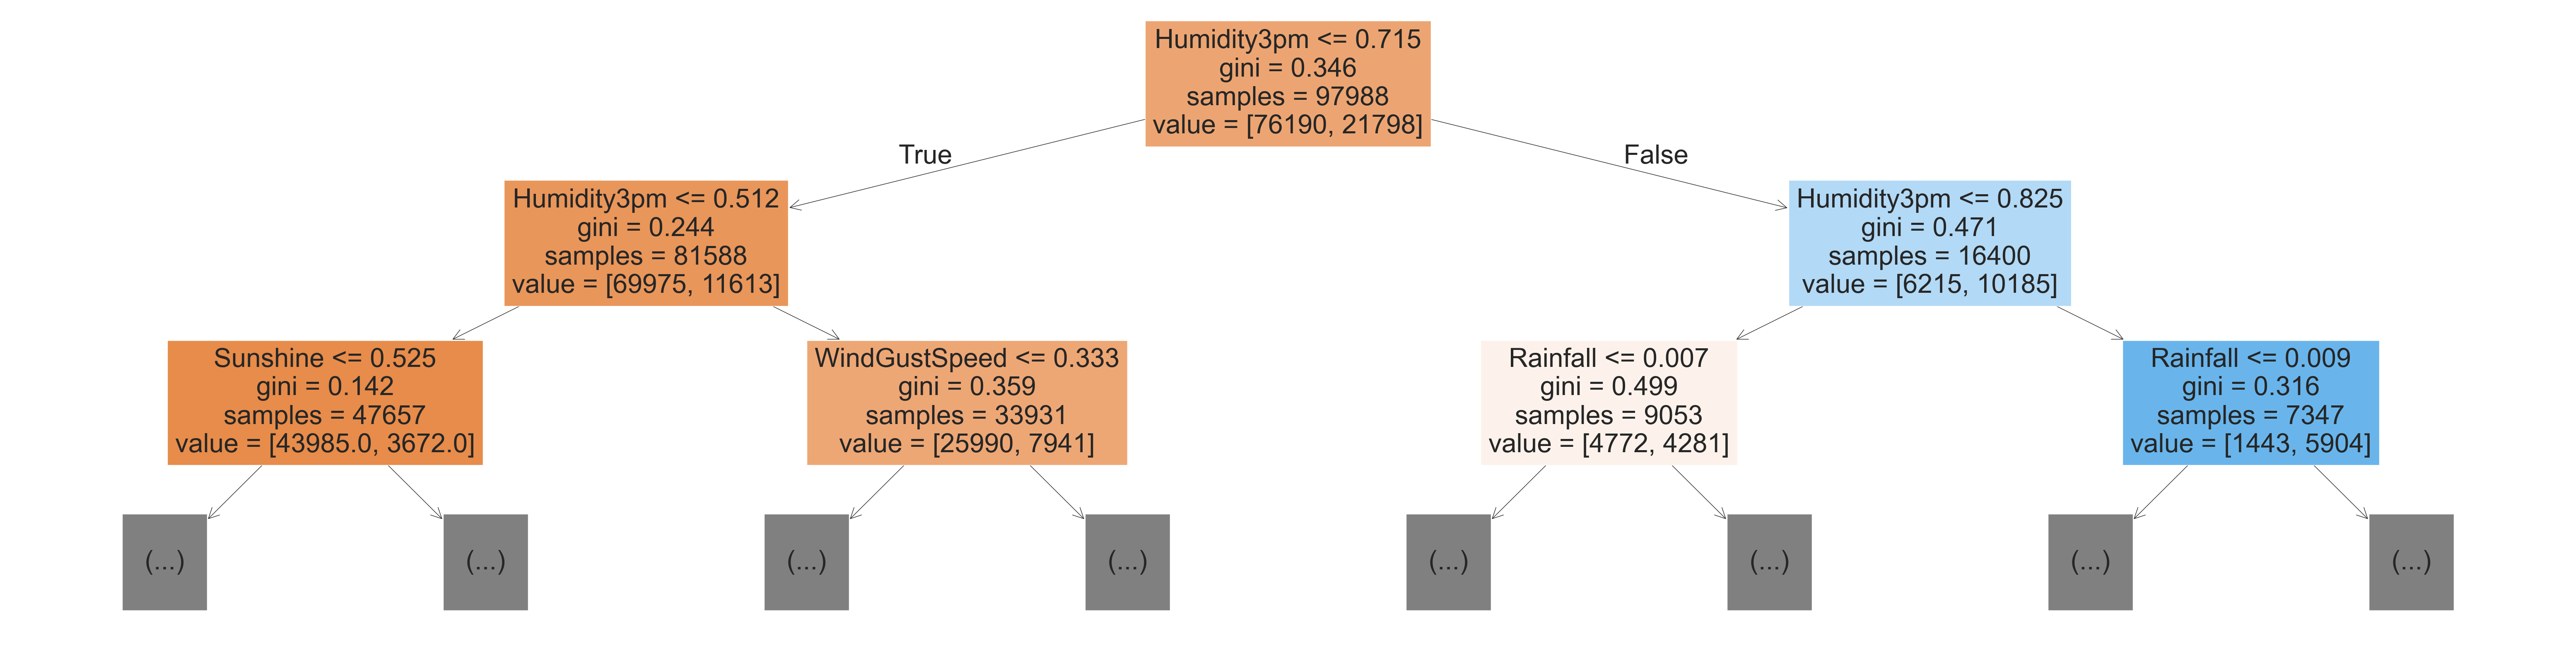

In [51]:
# The problem is , there is a overfitting problem.
# Lets visualize what is happening

from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names = x_train.columns, max_depth= 2, filled = True)

In [137]:
# Gini Score - How well the model is splitting for decisions
# Lower gini score, the better
tree_test = export_text(model, max_depth = 6, feature_names= list(x_train.columns))
print(tree_test[: 5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |--- WindGustDir_N >  0.50
|   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindGustSpeed <= 0.53
|   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |--- WindGustSpeed >  0.53
|   |   |   |   |   |   |   |--- truncated branch of depth 2


In [138]:
# Feature Important - based on gini index
# These results used to interpret the results given by Decision tree

model.feature_importances_

array([5.54705633e-03, 6.62393957e-03, 6.04542463e-02, 1.54903134e-03,
       5.62832229e-02, 8.52052508e-02, 6.29489729e-04, 2.96909797e-03,
       8.71114050e-03, 6.55451104e-01, 3.09436998e-03, 7.22007792e-02,
       0.00000000e+00, 1.28007546e-02, 1.09075941e-02, 2.34137017e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.01834469e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.86776053e-05,
       7.69755350e-04, 0.00000000e+00, 0.00000000e+00, 9.17046627e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.72067131e-03,
       0.00000000e+00, 0.00000000e+00, 4.40441456e-04, 6.90490616e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.42688823e-04,
       0.00000000e+00, 4.77065832e-04, 0.00000000e+00, 3.53444853e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [139]:
importance_df = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending= False)

In [140]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.655451
5,WindGustSpeed,0.085205
11,Pressure3pm,0.072201
2,Rainfall,0.060454
4,Sunshine,0.056283
13,Cloud3pm,0.012801
14,Temp9am,0.010908
8,Humidity9am,0.008711
1,MaxTemp,0.006624
0,MinTemp,0.005547


<Axes: xlabel='importance', ylabel='feature'>

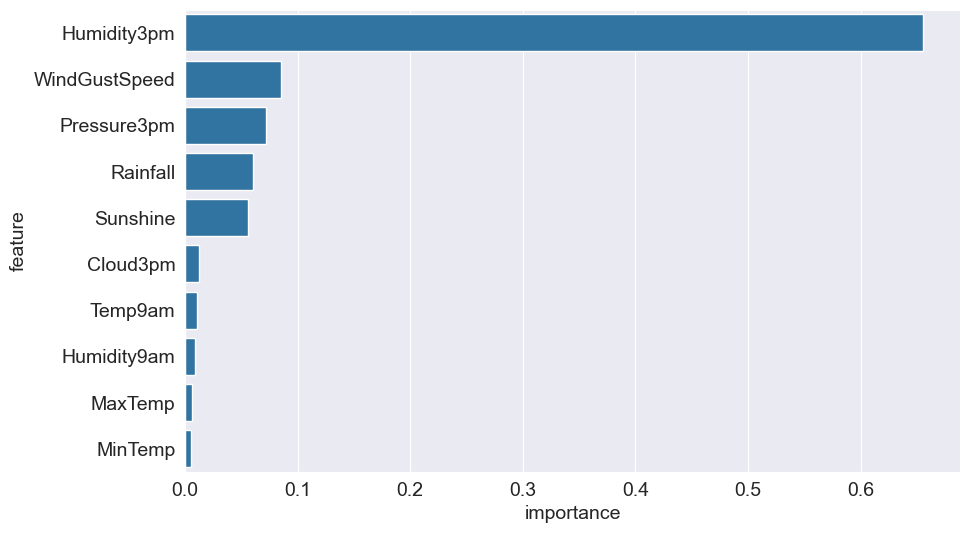

In [141]:
sns.barplot(data = importance_df.head(10), x = 'importance', y = 'feature')

In [142]:
# Hyperparamters tuning and overfitting
# So it might have gone aroun 48 - 60 levels deep, so lets keep a maximum value of depth 4
model = DecisionTreeClassifier(max_depth=8, random_state=60)
model.fit(x_train, train_targets)

DecisionTreeClassifier(max_depth=8, random_state=60)

In [143]:
model.score(x_train, train_targets)

0.8551863493488998

In [144]:
model.score(x_val, val_targets)

0.8459242787758207

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]\nclass = No'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]\nclass = No'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngi

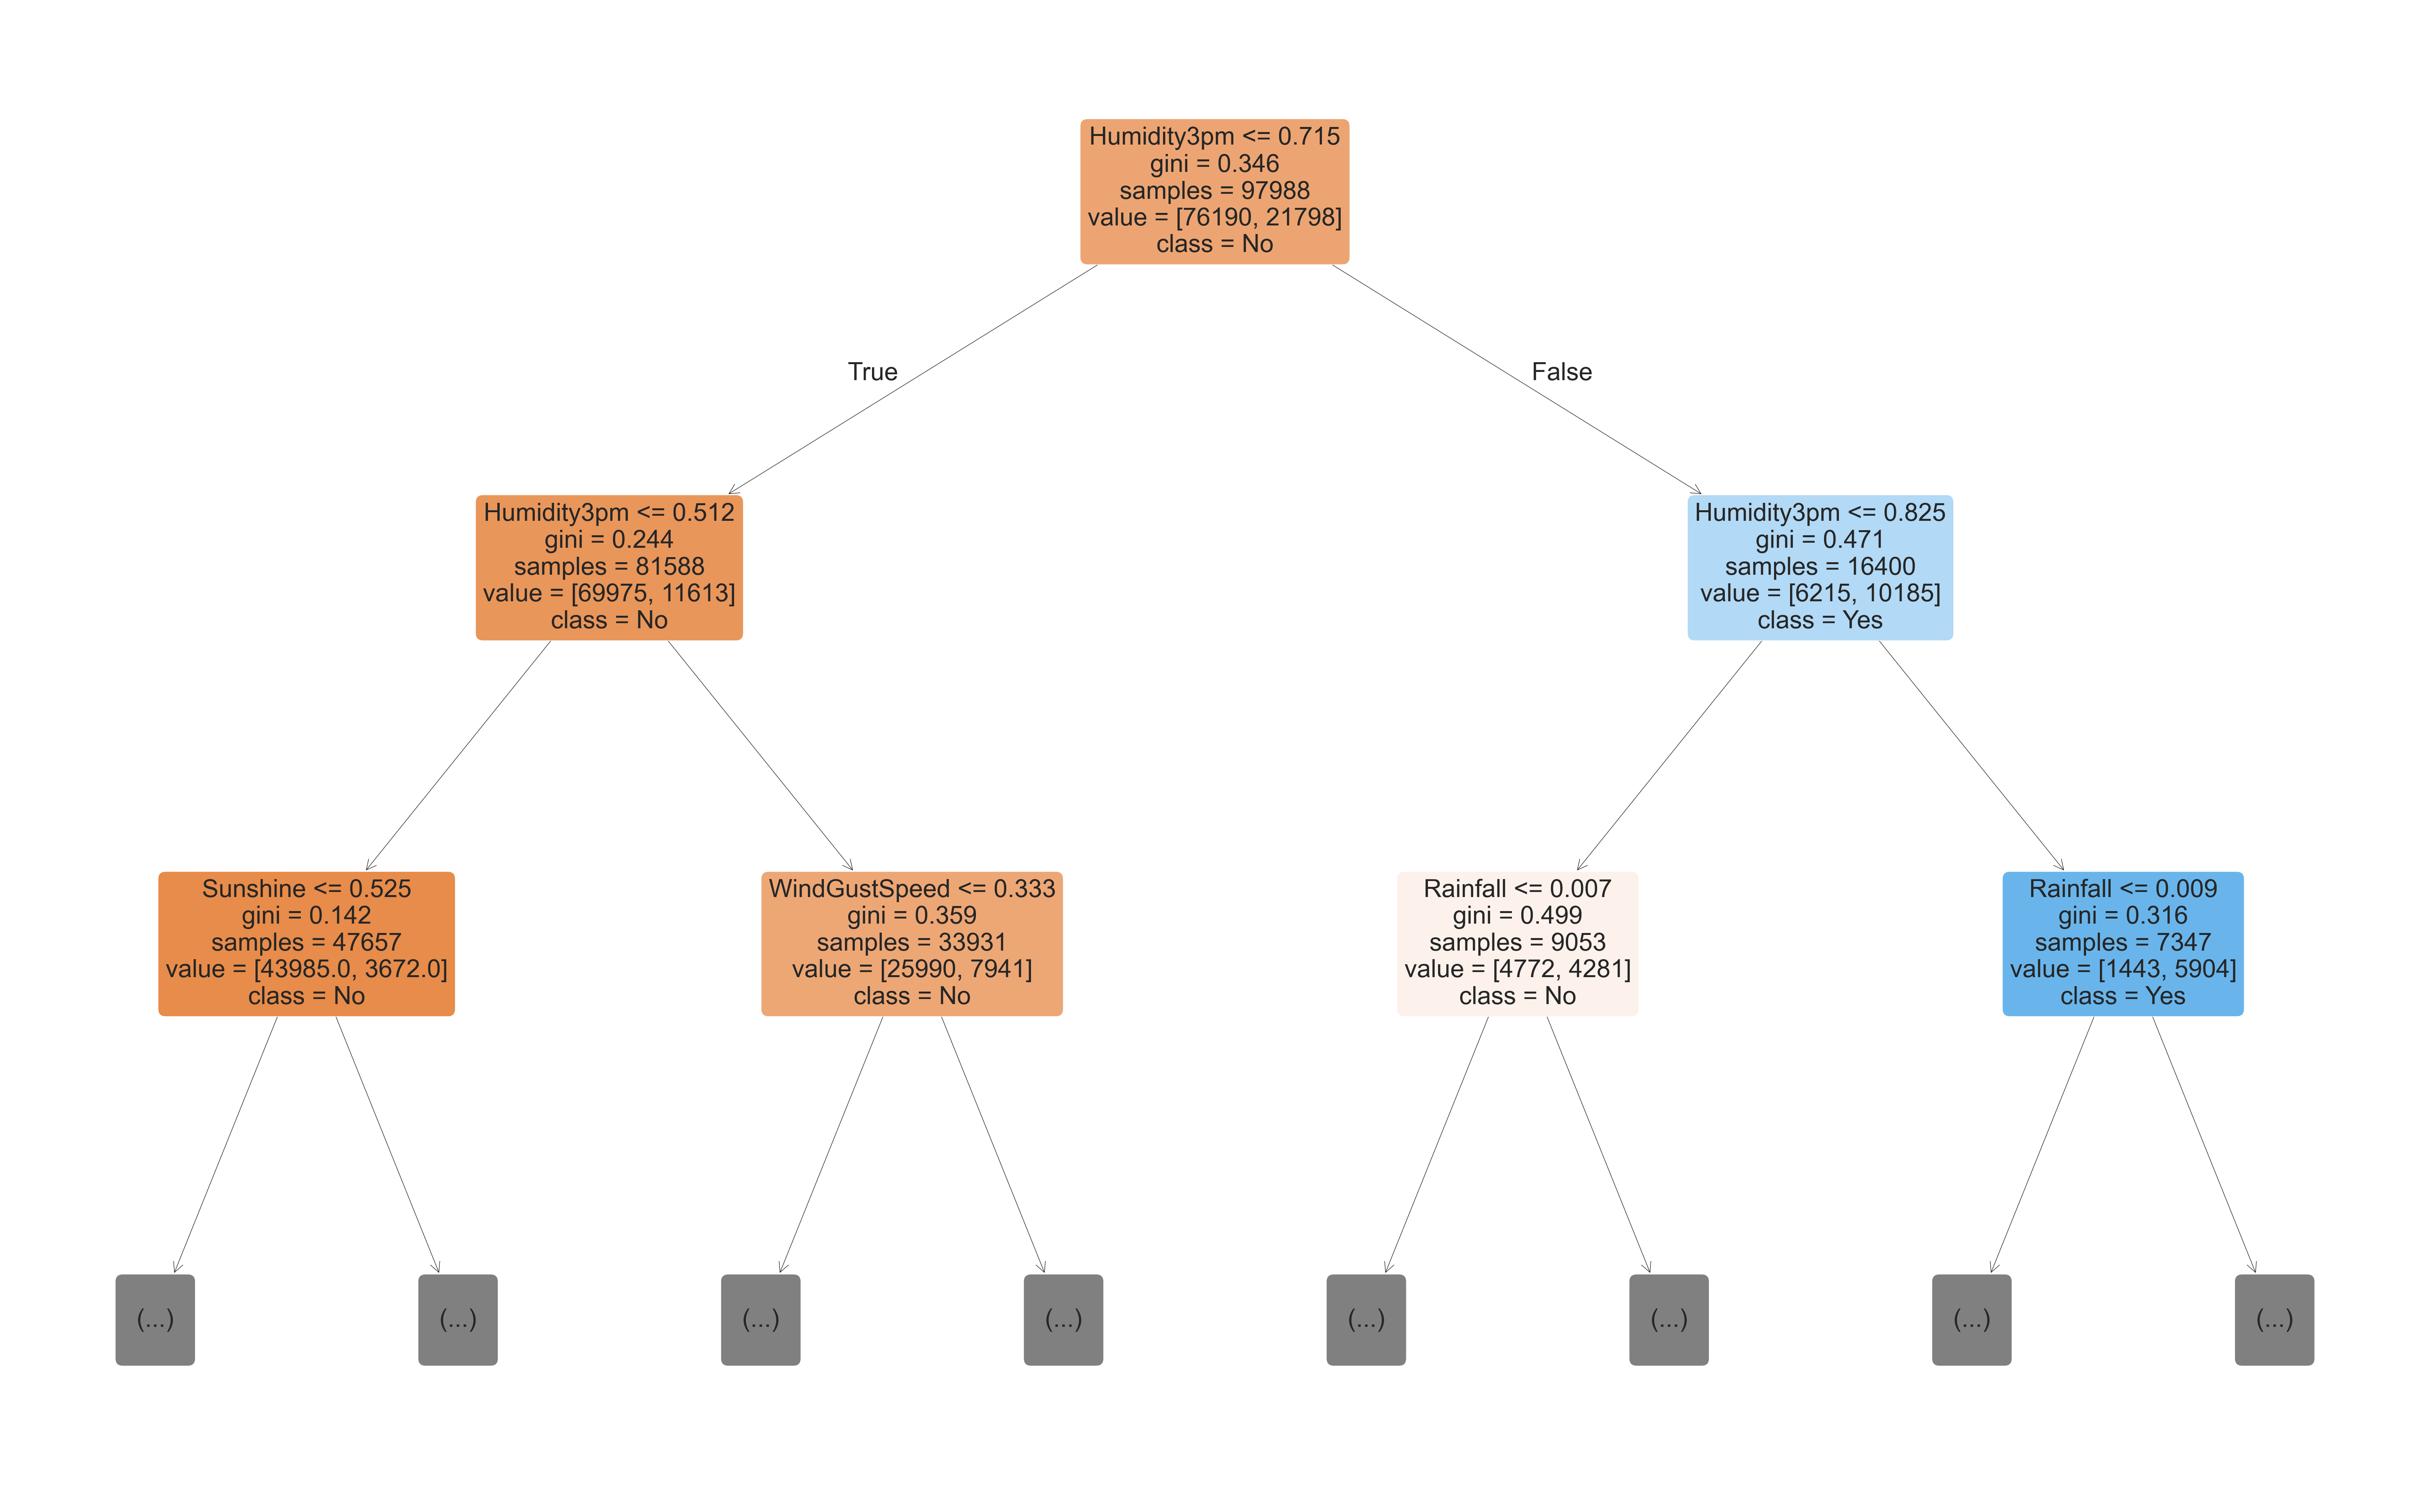

In [145]:
plt.figure(figsize=(80, 50))
plot_tree(model, feature_names = x_train.columns, max_depth= 2, rounded = True, class_names= model.classes_, filled = True)

In [146]:
print(export_text(model, feature_names= list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- WindGustDir_N >  0.50
|   |   |   |   |   |   |   |--- Sunshine <= 0.40
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Sunshine >  0.40
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- Humidity9am <= 0.80
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Humidity9am >  0.80
|   |   |   |   |   |   |   |   |--- class: Yes


In [147]:
# Method to reduce the error becuase of overfitting in decision tree
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth= md, random_state= 60)
    model.fit(x_train, train_targets)
    train_error = 1 - model.score(x_train, train_targets)
    val_error = 1 - model.score(x_val, val_targets)
    return {'Max Depth' : md, 'Training Error' : train_error, 'Validation Error' : val_error}

In [148]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [149]:
errors_df
# This way we will understand where the error can happen untill whcih depth

,Max Depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154661
7,8,0.144814,0.154076
8,9,0.139425,0.154485
9,10,0.131822,0.154427


Text(0.5, 0, 'Max Depth')

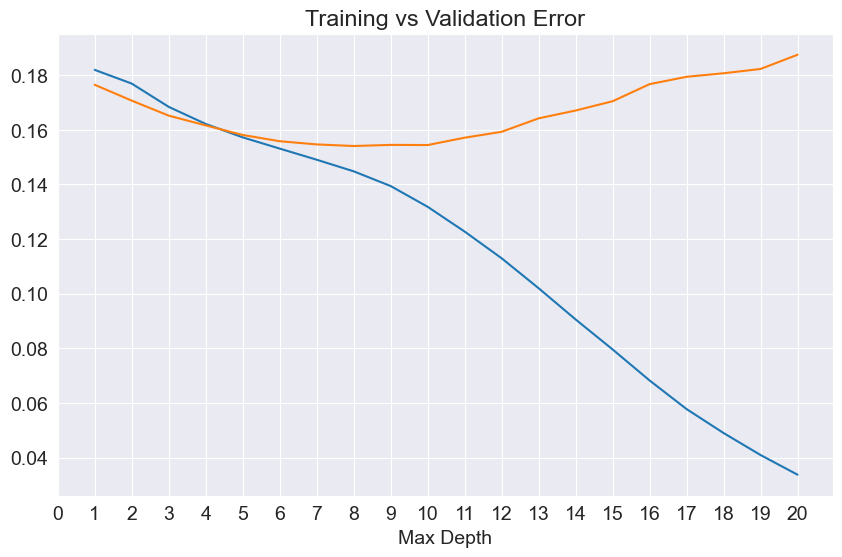

In [150]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21))
plt.xlabel('Max Depth')

# Seems like the best fit is 6 or 7

In [152]:
model.score(x_val, val_targets), model.score(x_train, train_targets)

(0.8459242787758207, 0.8551863493488998)

In [162]:
# Hypermparameter Models
# max_leaf_nodes = another way to control the size of complexity of a decision tree is to limit the number of leaf nodes
# This allows branches of the tree have varying depths

model = DecisionTreeClassifier(max_leaf_nodes= 128, random_state = 69)
model.fit(x_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=69)

In [163]:
model.score(x_train, train_targets)

0.852696248520227

In [164]:
model.tree_.max_depth

11

In [169]:
model_text = export_text(model, feature_names= list(x_train.columns))
print(model_text[:10000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

In [170]:
# RANDOM FOREST !!
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Ensembling is the power of cancelling out errors of multiple decision trees to give the best results
# It is a type of supervised learning where the goal is to predict a continuous output variable.

In [171]:
model = RandomForestClassifier(n_jobs = -1, random_state= 69)
# n_jobs = used for parallely training multiple decision trees  

In [172]:
model.fit(x_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=69)

In [173]:
model.score(x_train, train_targets)

0.9999693840062048

In [174]:
model.score(x_val, val_targets)

0.8561062671894201

In [175]:
train_proba = model.predict_proba(x_train)
train_proba

array([[0.92, 0.08],
       [0.96, 0.04],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.95, 0.05]])

In [176]:
len(model.estimators_)

100

In [178]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1272380470)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.348\nsamples = 61813\nvalue = [76016, 21972]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.755\ngini = 0.257\nsamples = 47923\nvalue = [64262, 11483]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud3pm <= 0.611\ngini = 0.206\nsamples = 44242\nvalue = [61804, 8139]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Location_MountGinini <= 0.5\ngini = 0.488\nsamples = 3681\nvalue = [2458, 3344]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pressure3pm <= 0.561\ngini = 0.498\nsamples = 13890\nvalue = [11754.0, 10489.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Temp3pm <= 0.435\ngini = 0.48\nsamples = 5235\nvalue = [3342, 5001]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'MinTemp <= 0.367\ngini = 0.478\nsamples = 8655\nvalue = [8412, 5488]'),
 Text(0.8125, 0.125,

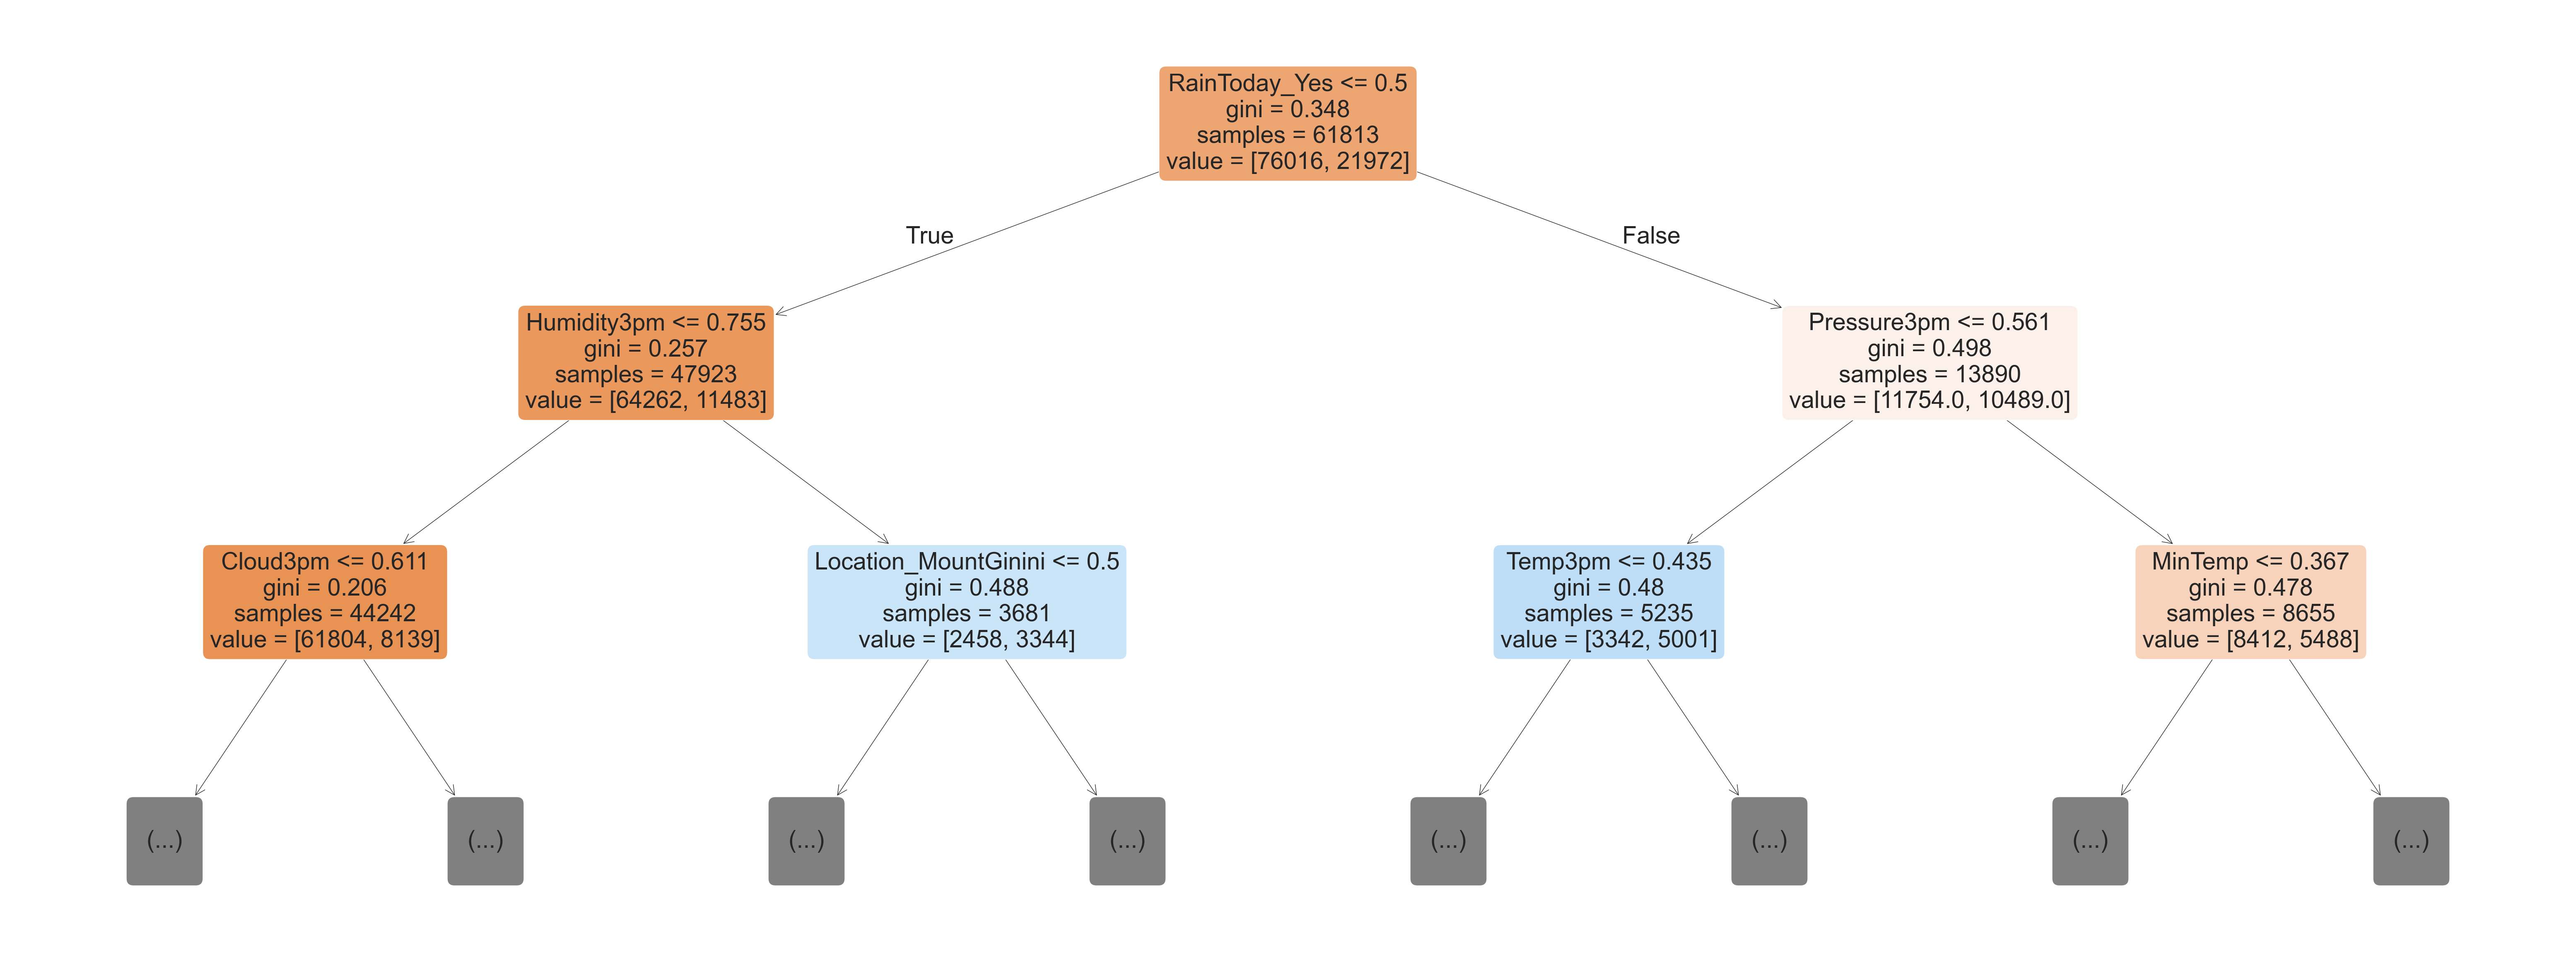

In [179]:
plt.figure(figsize=(80, 30))
plot_tree(model.estimators_[0], max_depth=2, feature_names=x_train.columns, filled = True, rounded = True)

[Text(0.5, 0.875, 'Location_Woomera <= 0.5\ngini = 0.345\nsamples = 62012\nvalue = [76257, 21731]'),
 Text(0.25, 0.625, 'WindGustDir_NW <= 0.5\ngini = 0.349\nsamples = 60675\nvalue = [74294, 21591]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Cloud9am <= 0.722\ngini = 0.344\nsamples = 57211\nvalue = [70497, 19949]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Cloud3pm <= 0.611\ngini = 0.422\nsamples = 3464\nvalue = [3797.0, 1642.0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.695\ngini = 0.124\nsamples = 1337\nvalue = [1963, 140]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'MinTemp <= 0.735\ngini = 0.09\nsamples = 1294\nvalue = [1946, 97]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'RainToday_No <= 0.5\ngini = 0.406\nsamples = 43\nvalue = [17, 43]'),
 Text(0.8125, 0.125, '\n  (...)  \

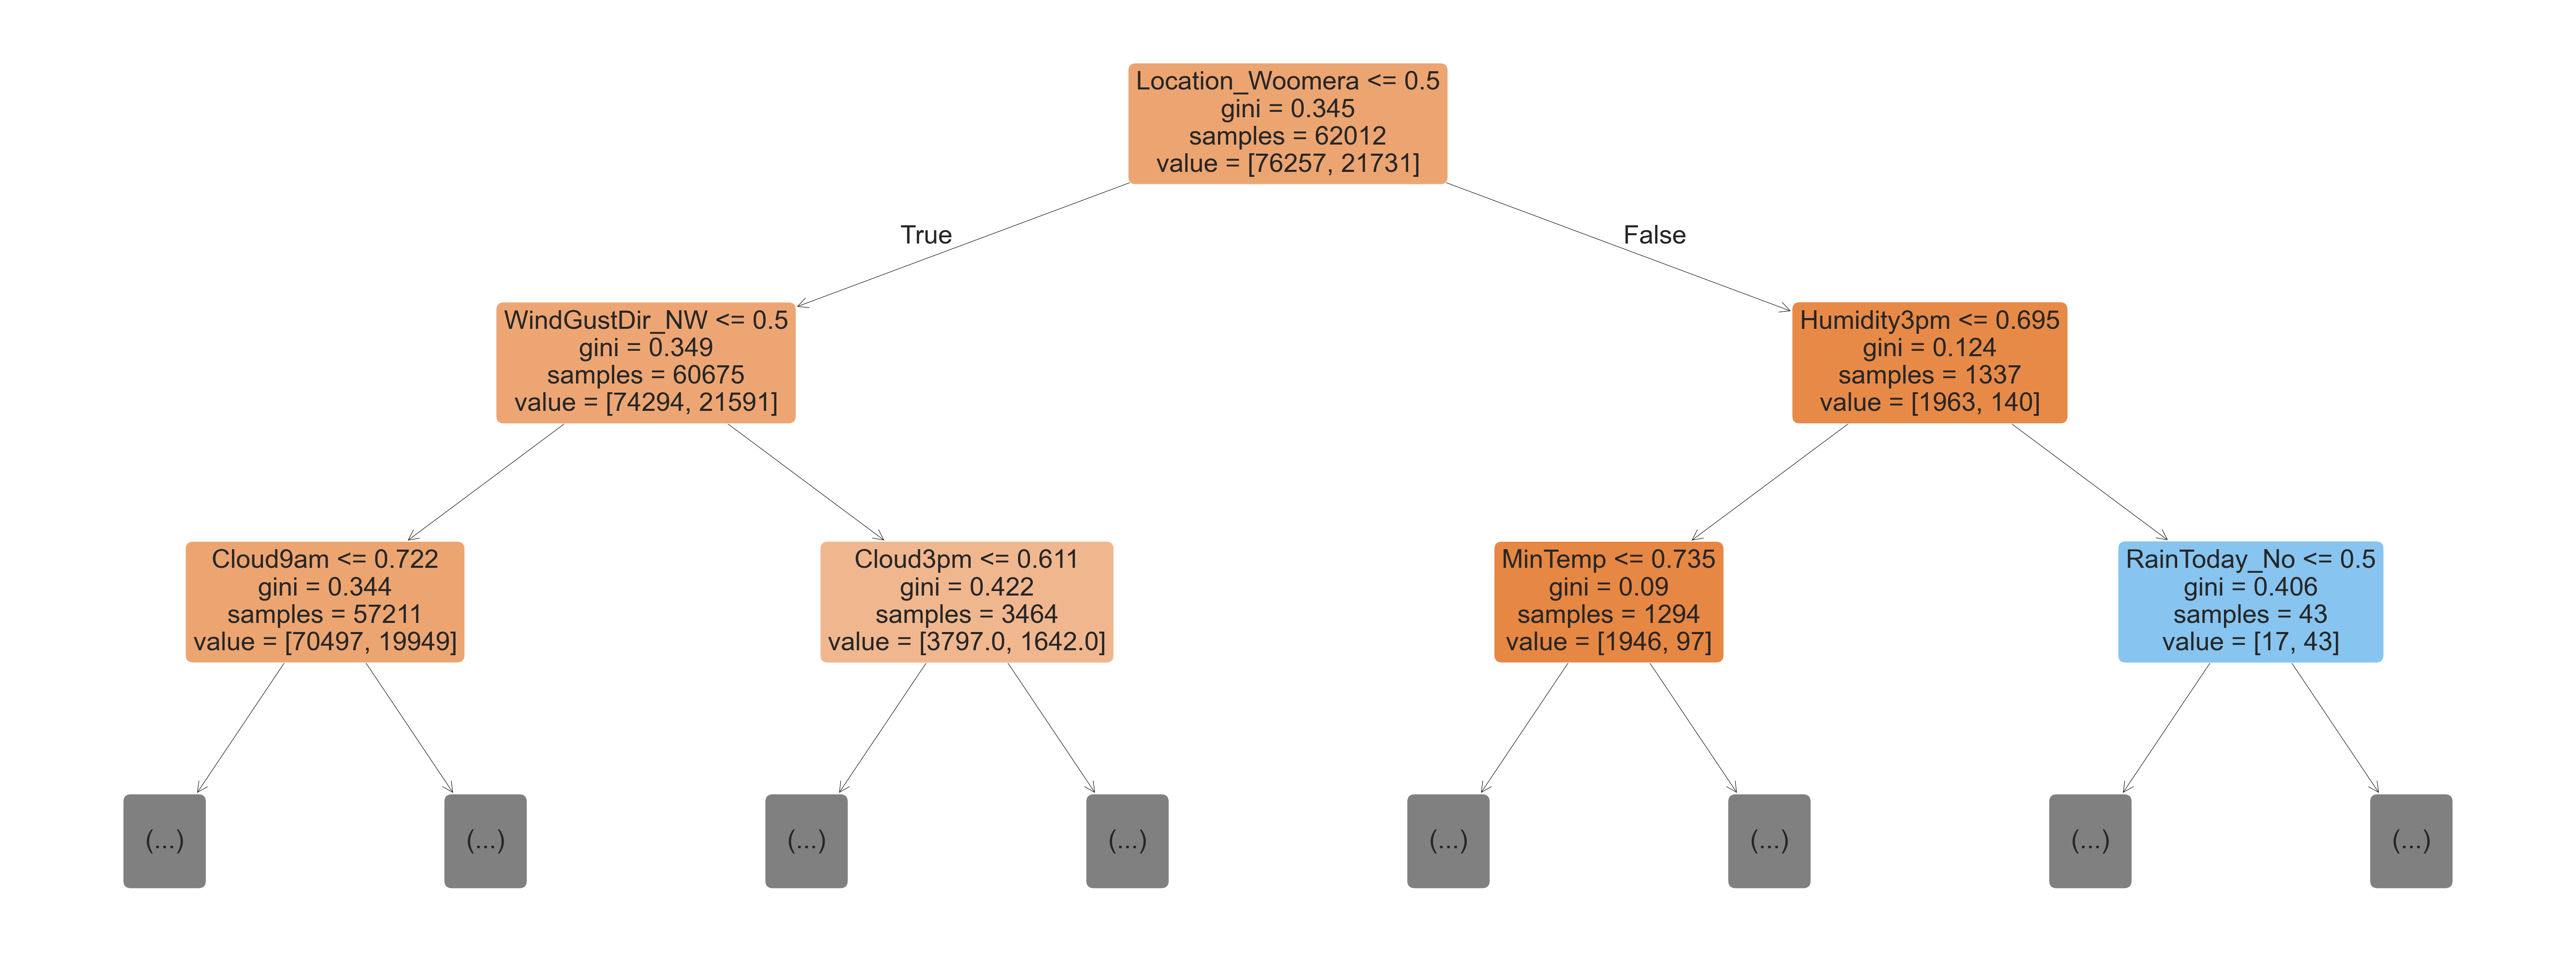

In [180]:
plt.figure(figsize=(80, 30))
plot_tree(model.estimators_[69], max_depth=2, feature_names=x_train.columns, filled = True, rounded = True)

In [183]:
importance_df = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending= False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139066
4,Sunshine,0.057298
11,Pressure3pm,0.053677
2,Rainfall,0.049588
10,Pressure9am,0.048856
8,Humidity9am,0.047862
5,WindGustSpeed,0.047046
15,Temp3pm,0.046036
0,MinTemp,0.041244
1,MaxTemp,0.041133


<Axes: xlabel='importance', ylabel='feature'>

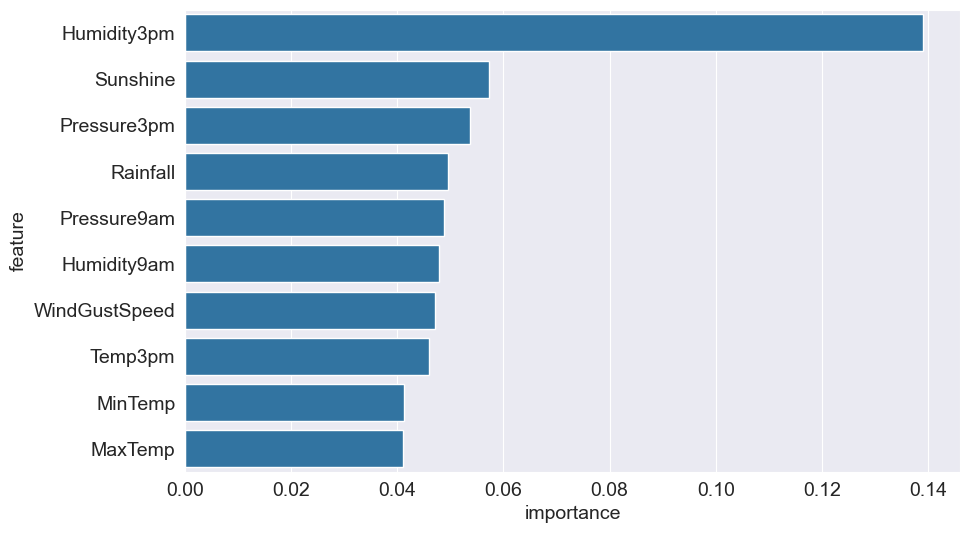

In [187]:
sns.barplot(data = importance_df.head(10), x = 'importance', y = 'feature')

In [189]:
# Hyperparameter tuning
base_model = RandomForestClassifier(random_state = 60, n_jobs=-1).fit(x_train, train_targets)
base_model

RandomForestClassifier(n_jobs=-1, random_state=60)

In [190]:
base_model.score(x_val, val_targets)

0.857627713733981

In [191]:
# Controlling the number of estimators - method 1
model = RandomForestClassifier(random_state = 60, n_jobs=-1, n_estimators=10).fit(x_train, train_targets)
model.score(x_val, val_targets), model.score(x_train, train_targets)

(0.8455146585522851, 0.9872025145936237)

In [209]:
model = RandomForestClassifier(random_state = 60, n_jobs=-1, n_estimators=20).fit(x_train, train_targets)
model.score(x_val, val_targets), model.score(x_train, train_targets)

(0.8521270993036456, 0.9959280728252439)

In [196]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, train_targets)
    return model.score(x_train, train_targets), model.score(x_val, val_targets)

In [197]:
test_params(max_depth=5)

(0.8219067640935624, 0.8261454736965299)

In [202]:
test_params(max_leaf_nodes=2**9)

(0.8656876352206393, 0.8486745859909883)

In [211]:
# Figuring out which features to split only - hyperparameter tuning method
test_params(min_samples_split = 3, min_samples_leaf = 2)

(0.9624852022696657, 0.8562233015390017)